# statistieken

In [1]:
import bluebelt as blue

In [2]:
blue.set_style("fat")
blue.set_figsize_in_pixels(500, 350)
blue.set_language('nl')
blue.set_transparent(False)

In [3]:
frame = blue.create.frame(1, 4) # 1 jaar, 4 skills
series = blue.create.series(1)

### normaal verdeelde data

Wanneer data normaal verdeeld is kan eenvoudiger iets over de de kans dat een bepaalde observatie voorkomt worden gezegd. Het controleren of de data normaal verdeeld is kan daarmee dus belangrijk zijn, bijvoorbeeld om te kijken of de residuals (observatie - patroon) van een polynoom normaal verdeeld zijn. Met deze aanname wordt de bandbreedte in de weergave bepaald, dus een controle hierop helpt om dat beeld te bekrachtigen.

De eerste controle is of de data in de series dus normaal verdeeld is.

DAgostinoPearson(nrows=364, ncols=1, alpha=0.05, p_value=0.00, passed=False)


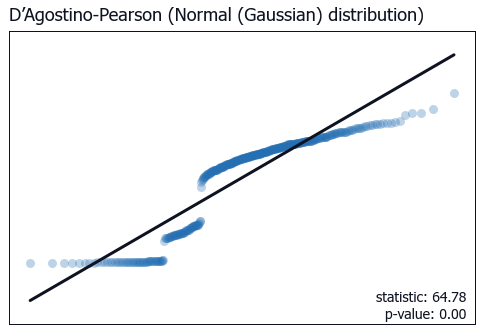

In [4]:
norm = series._.stats.normal_distribution()
print(norm)
norm.plot()

Wanneer we alleen naar de werkdagen kijken zien we een heel ander beeld.

DAgostinoPearson(nrows=364, ncols=1, alpha=0.05, p_value=0.14, passed=True)


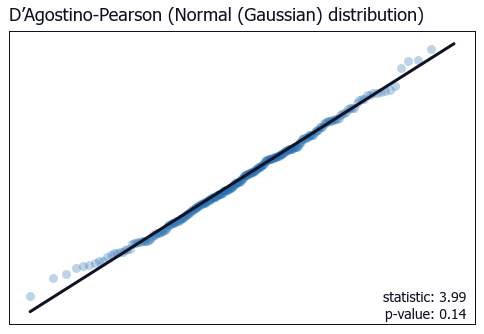

In [5]:
norm = series._.workdays()._.stats.normal_distribution()
print(norm)
norm.plot()

Ook van een frame kunnen we controleren of de data normaal verdeeld is.

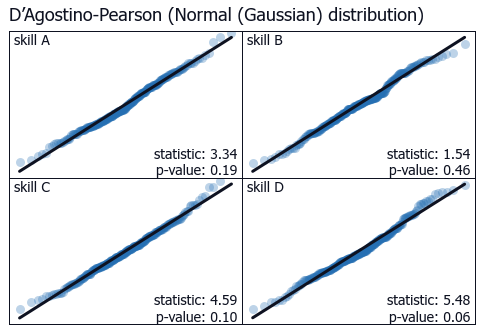

In [6]:
frame._.workdays()._.stats.normal_distribution().plot()

En we kunnen ook een andere test toepassen als we dat zouden willen.

norm


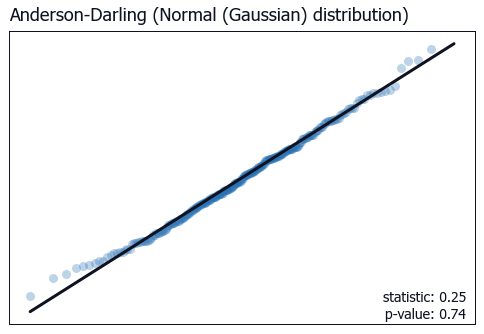

In [7]:
ad = series._.workdays()._.stats.anderson_darling()
print(ad.dist)
ad.plot()

### test het gemiddelde

We kunnen ook controleren of het gemiddelde van de dataset voldoet aan het verwachtte gemiddelde van de data. Met andere woorden; is het gemiddelde van de steekproef (de dataset) gelijk aan het gemiddelde van de populatie (alles wat we weten).

Omdat we in de statiek vanuit kansen rekenen berekenen we niet alleen het gemiddelde maar ook de bandbreedte waarbinnen we een bepaalde mate van zekerheid (standaard 95%) weten dat dit gemiddelde zich bevind. Hoe meer data in de steekproef beschikbaar is hoe zekerder we zijn van het gemiddelde en hoe kleiner dus die bandbreedte.

We vergelijken het gemiddelde van de steekproef met het bekende (of verwachte) gemiddelde van de populatie met een 'one sample t-test'. 

-----------------------------
  One Sample t-Test results
-----------------------------

input variables
--------------------------------------------------
  observations:                 357
  confidence:                   0.95
  alpha:                        0.05
  population mean:              450

result
--------------------------------------------------
  statistic:                    -5.1145
  p-value:                      0.0000
  passed:                       False



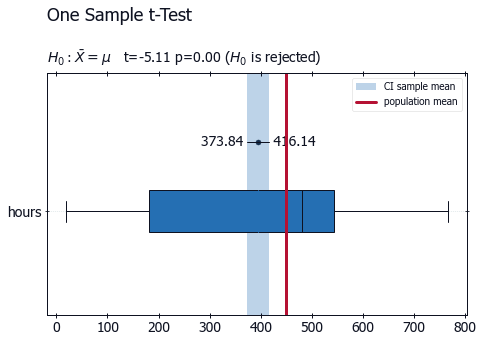

In [8]:
ost = series._.stats.one_sample_t(popmean=450)
print(ost)
ost.plot()

De blauwe band geeft de marge waarin het gemiddelde van de steekproef zich bevind aan. Hoe meer data, hoe zekerder dit gemiddelde. Omgekeerd is dat ook waar; wanneer we bijvoorbeeld maar 10 datapunten van de series kiezen is de marge zeer groot. Daarmee wordt $H_0$ geaccepteerd maar dat wil dus niet zeggen dat het waar is. Er is enkel niet voldoende bewijs gevonden dat het gemiddelde van de steekproef afwijkt van het gemiddelde van de populatie.

-----------------------------
  One Sample t-Test results
-----------------------------

input variables
--------------------------------------------------
  observations:                 10
  confidence:                   0.95
  alpha:                        0.05
  population mean:              450

result
--------------------------------------------------
  statistic:                    -1.1636
  p-value:                      0.2745
  passed:                       True



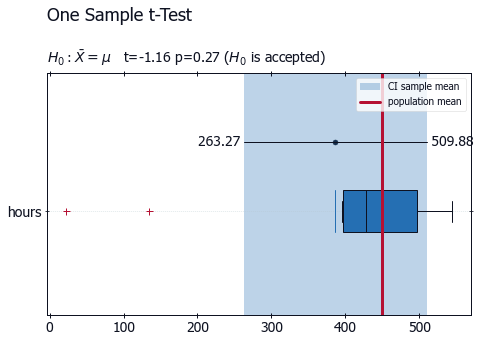

In [9]:
ost = series[:10]._.stats.one_sample_t(popmean=450)
print(ost)
ost.plot()

### gelijke gemiddelden

We kunnen ook kijken of twee of meer groepen data gelijke gemiddelden hebben. Hiervoor is een aantal tests beschikbaar die allemaal op verschillende soorten datasets moeten worden ingezet.

In [10]:
blue.statistics.hypothesis_testing.index()

         Y          X investigate # data groups distribution                   test     bluebelt
  discrete   discrete           -             -            -        chi square test             
  discrete continuous           -             -            -    logistic regression             
continuous   discrete        mean             1       normal        1 sample t-test one_sample_t
continuous   discrete        mean             1   non-normal 1 sample Wilcoxon test     wilcoxon
continuous   discrete        mean             2       normal        2 sample t-test two_sample_t
continuous   discrete        mean             2   non-normal      Mann-Whitney test mann_whitney
continuous   discrete        mean            >2       normal            1 way Anova        anova
continuous   discrete        mean            >2   non-normal    Kruskal-Wallis test      kruskal
continuous   discrete    variance             2       normal                 F-test       f_test
continuous   discrete    varia

Het is het eenvoudigst om gebruik te maken van de standaard binnen bluebelt die de bovenstaande afwegingen binnen het algoritme maakt. Hiervoor is de functie $equal\_means()$ beschikbaar.

--------------------------
  Kruskal-Wallis results
--------------------------

input variables
--------------------------------------------------
  observations:                 364
  confidence:                   0.95
  alpha:                        0.05

result
--------------------------------------------------
  statistic:                    16.7268
  p-value:                      0.0008
  passed:                       False



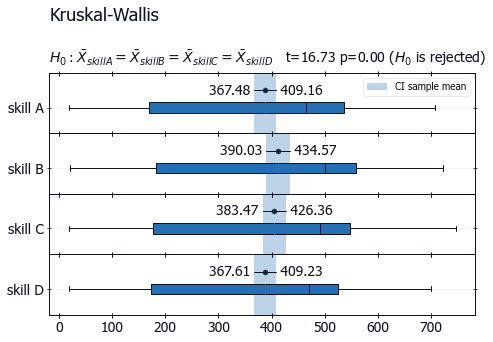

In [11]:
em = frame._.stats.equal_means()
print(em)
em.plot()

Maar een eigen test kiezen kan natuurlijk ook.

-----------------------------
  Two Sample t-Test results
-----------------------------

input variables
--------------------------------------------------
  observations:                 364
  confidence:                   0.95
  alpha:                        0.05

result
--------------------------------------------------
  statistic:                    -1.5462
  p-value:                      0.1225
  passed:                       True



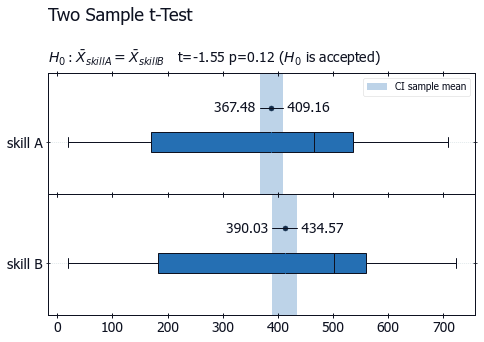

In [12]:
em = frame.iloc[:,:2]._.stats.two_sample_t()
print(em)
em.plot()

### gelijke variantie

Naast het onderzoeken van een gelijk gemiddelde kunnen we ook kijken naar een gelijke variantie, ofwel spreiding van de data. Ook hiervoor zijn verschillende testen beschikbaar en bestaat de mogelijkheid om het algoritme de beste keuze te laten maken. Hiervoor is de functie $equal\_variances()$ beschikbaar.

In [13]:
blue.statistics.hypothesis_testing.index()

         Y          X investigate # data groups distribution                   test     bluebelt
  discrete   discrete           -             -            -        chi square test             
  discrete continuous           -             -            -    logistic regression             
continuous   discrete        mean             1       normal        1 sample t-test one_sample_t
continuous   discrete        mean             1   non-normal 1 sample Wilcoxon test     wilcoxon
continuous   discrete        mean             2       normal        2 sample t-test two_sample_t
continuous   discrete        mean             2   non-normal      Mann-Whitney test mann_whitney
continuous   discrete        mean            >2       normal            1 way Anova        anova
continuous   discrete        mean            >2   non-normal    Kruskal-Wallis test      kruskal
continuous   discrete    variance             2       normal                 F-test       f_test
continuous   discrete    varia

------------------
  Levene results
------------------

input variables
--------------------------------------------------
  observations:                 364
  alpha:                        0.05

result
--------------------------------------------------
  statistic:                    0.5119
  p-value:                      0.6741
  passed:                       True



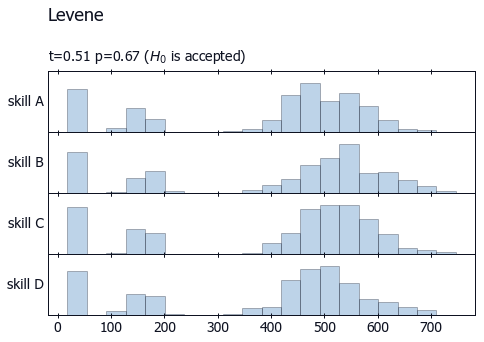

In [14]:
ev = frame._.stats.equal_variances()
print(ev)
ev.plot()

--------------------
  Bartlett results
--------------------

input variables
--------------------------------------------------
  observations:                 364
  alpha:                        0.05

result
--------------------------------------------------
  statistic:                    2.1802
  p-value:                      0.5359
  passed:                       True



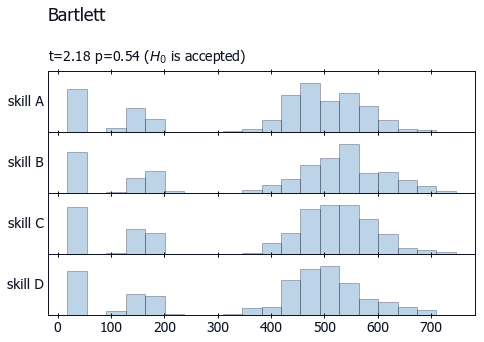

In [15]:
bart = frame._.stats.bartlett()
print(bart)
bart.plot()

### correlatie

We kunnen ook onderzoeken of data gecorreleerd is; heeft de ene groep datapunten verband met de andere groep datapunten? Dit kan bijvoorbeeld handig zijn om te bekijken een slechte forecast leidt tot een lagere opkomst van personeel. Of om te onderzoeken of een langer dienstverband leidt tot lager verzuim.

Het kwadraat van de r-waarde geeft de relevatie van de relatie aan. Dus hoe hoger de r, hoe sterker de relatie tussen de groepen observaties. Let op, dit zegt niets over oorzaak en gevolg. We tonen alleen aan dat twee of meer groepen met elkaar verbonden zijn maar niet in welke richting dat verband werkt.

Relevantie is altijd een arbitrair begrip. Over het algemeen wordt gesteld van bij $r^2 > 0.8$ een zeer sterke relatie is bewezen. Dit betekent dus dat hiervoor $r$ minimaal $0.89$ groot moet zijn. In de onderstaande tabel zie je een aantal voorbeelden om te zien hoe relevant de correlatie is bij een bepaalde $r$ waarde.

In [16]:
import numpy as np
for i in np.arange(0, 1, 0.05):
    print(f"r={i:1.2f} => r2={i**2:1.2f}")

r=0.00 => r2=0.00
r=0.05 => r2=0.00
r=0.10 => r2=0.01
r=0.15 => r2=0.02
r=0.20 => r2=0.04
r=0.25 => r2=0.06
r=0.30 => r2=0.09
r=0.35 => r2=0.12
r=0.40 => r2=0.16
r=0.45 => r2=0.20
r=0.50 => r2=0.25
r=0.55 => r2=0.30
r=0.60 => r2=0.36
r=0.65 => r2=0.42
r=0.70 => r2=0.49
r=0.75 => r2=0.56
r=0.80 => r2=0.64
r=0.85 => r2=0.72
r=0.90 => r2=0.81
r=0.95 => r2=0.90


Pearson correlation coefficient with 95.0% confidence interval

        skill A                 skill B                 skill C                
              r              CI       r              CI       r              CI
skill A                           0.339  [0.332, 0.346]   0.421  [0.414, 0.428]
skill B   0.339  [0.332, 0.346]                           0.291  [0.284, 0.298]
skill C   0.421  [0.414, 0.428]   0.291  [0.284, 0.298]                        


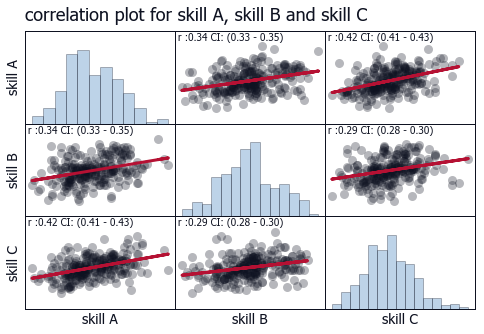

In [17]:
corr = frame.iloc[:,:3]._.workdays()._.stats.correlation()
print(corr)
corr.plot()

Pearson correlation coefficient with 95.0% confidence interval

        skill C                 skill B                
              r              CI       r              CI
skill C                           0.291  [0.284, 0.298]
skill B   0.291  [0.284, 0.298]                        


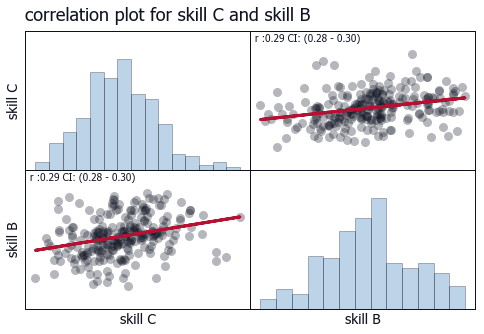

In [18]:
corr = frame[['skill C', 'skill B']]._.workdays().dropna()._.stats.correlation()
print(corr)
corr.plot()